# Example 1.1 Using stents to prevent strokes

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')

In [2]:
stent_30 = pd.read_csv("datasets/stent30.csv")
stent_365 = pd.read_csv("datasets/stent365.csv")

In [3]:
grouped_30 = stent_30.groupby(['group', 'outcome']).size().unstack()
grouped_30['total'] = grouped_30['no event'] + grouped_30['stroke']
grouped_30

outcome,no event,stroke,total
group,,,
control,214,13,227
treatment,191,33,224


In [4]:
grouped_365 = stent_365.groupby(['group', 'outcome']).size().unstack()
grouped_365['total'] = grouped_365['no event'] + grouped_365['stroke']
grouped_365

outcome,no event,stroke,total
group,,,
control,199,28,227
treatment,179,45,224


In [5]:
# Question 1. Compute the proportion of patients in the treatment group who had a stroke by the end of the year
prop_stroke_treatment_365 = (grouped_365.loc['treatment', 'stroke'] / grouped_365.loc['treatment', 'total']).round(2) * 100
prop_stroke_treatment_365

np.float64(20.0)

In [6]:
# Question 2. Compute the proportion of patients in the control group who had a stroke by the end of the year
prop_stroke_control_365 = (grouped_365.loc['control', 'stroke'] / grouped_365.loc['control', 'total']).round(2) * 100
prop_stroke_control_365

np.float64(12.0)

In [7]:
# Example 1.2 Country Dataset

In [8]:
country_df = pd.read_csv("datasets/county.csv")

In [9]:
country_df.head(5)

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671.0,54571,55504.0,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.70,55317.0,none
1,Baldwin County,Alabama,140415.0,182265,212628.0,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562.0,none
2,Barbour County,Alabama,29038.0,27457,25270.0,-6.22,27.2,68.0,11.1,5.90,no,hs_diploma,17891.73,33368.0,partial
3,Bibb County,Alabama,20826.0,22915,22668.0,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404.0,none
4,Blount County,Alabama,51024.0,57322,58013.0,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412.0,none


In [10]:
# poverty - Numerical (continous)
# pop201- - Numerical (discrete)
# state - Categorical

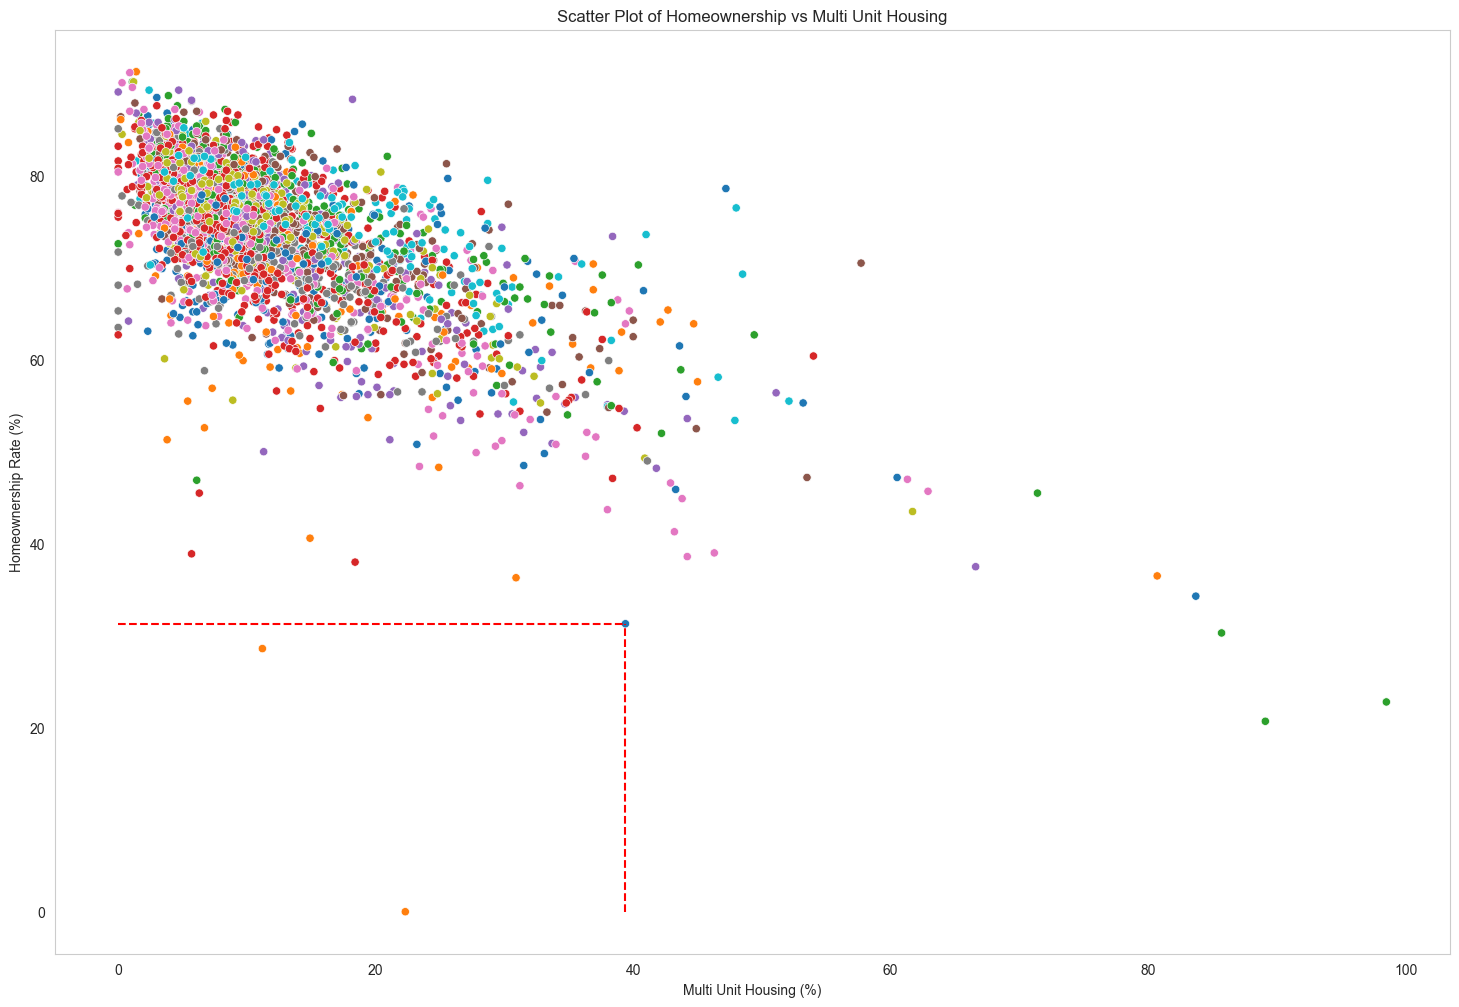

In [11]:
# Scatter Plot bt homeownership vs multi_unit


sns.set_style("whitegrid")

plt.figure(figsize=(18, 12))

sns.scatterplot(
    data=country_df,
    x='multi_unit',
    y='homeownership',
    hue='state',
    palette='tab10',
    legend=False
)

# let's create a y=x line for Chattahoochee County	Georgia which have homeownership = 31.3	and multi_unit = 39.4
plt.plot([0, 39.4], [31.3, 31.3 ], color='red', linestyle='--') # x, y - x,y
plt.plot([39.4, 39.4], [0, 31.3], color='red', linestyle='--') # x, y - x,y

plt.xlabel('Multi Unit Housing (%)')
plt.ylabel('Homeownership Rate (%)')
plt.title('Scatter Plot of Homeownership vs Multi Unit Housing')
plt.grid(False)
plt.show()

In [12]:
country_df[(pd.col('homeownership') < 38) & (pd.col('multi_unit') < 50)]

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
68,Aleutians West Census Area,Alaska,5465.0,5561,5763.0,0.19,7.5,36.3,30.9,3.63,no,hs_diploma,28443.14,85192.0,none
412,Chattahoochee County,Georgia,14882.0,11267,10343.0,-15.54,15.0,31.3,39.4,7.33,yes,some_college,20921.31,46096.0,none
548,Kalawao County,Hawaii,147.0,90,88.0,-1.12,12.7,0.0,22.3,NaN,NaN,some_college,50133.57,61750.0,NaN
2369,Buffalo County,South Dakota,2032.0,1912,1999.0,-1.28,40.5,28.6,11.2,7.54,no,hs_diploma,10466.84,30500.0,none


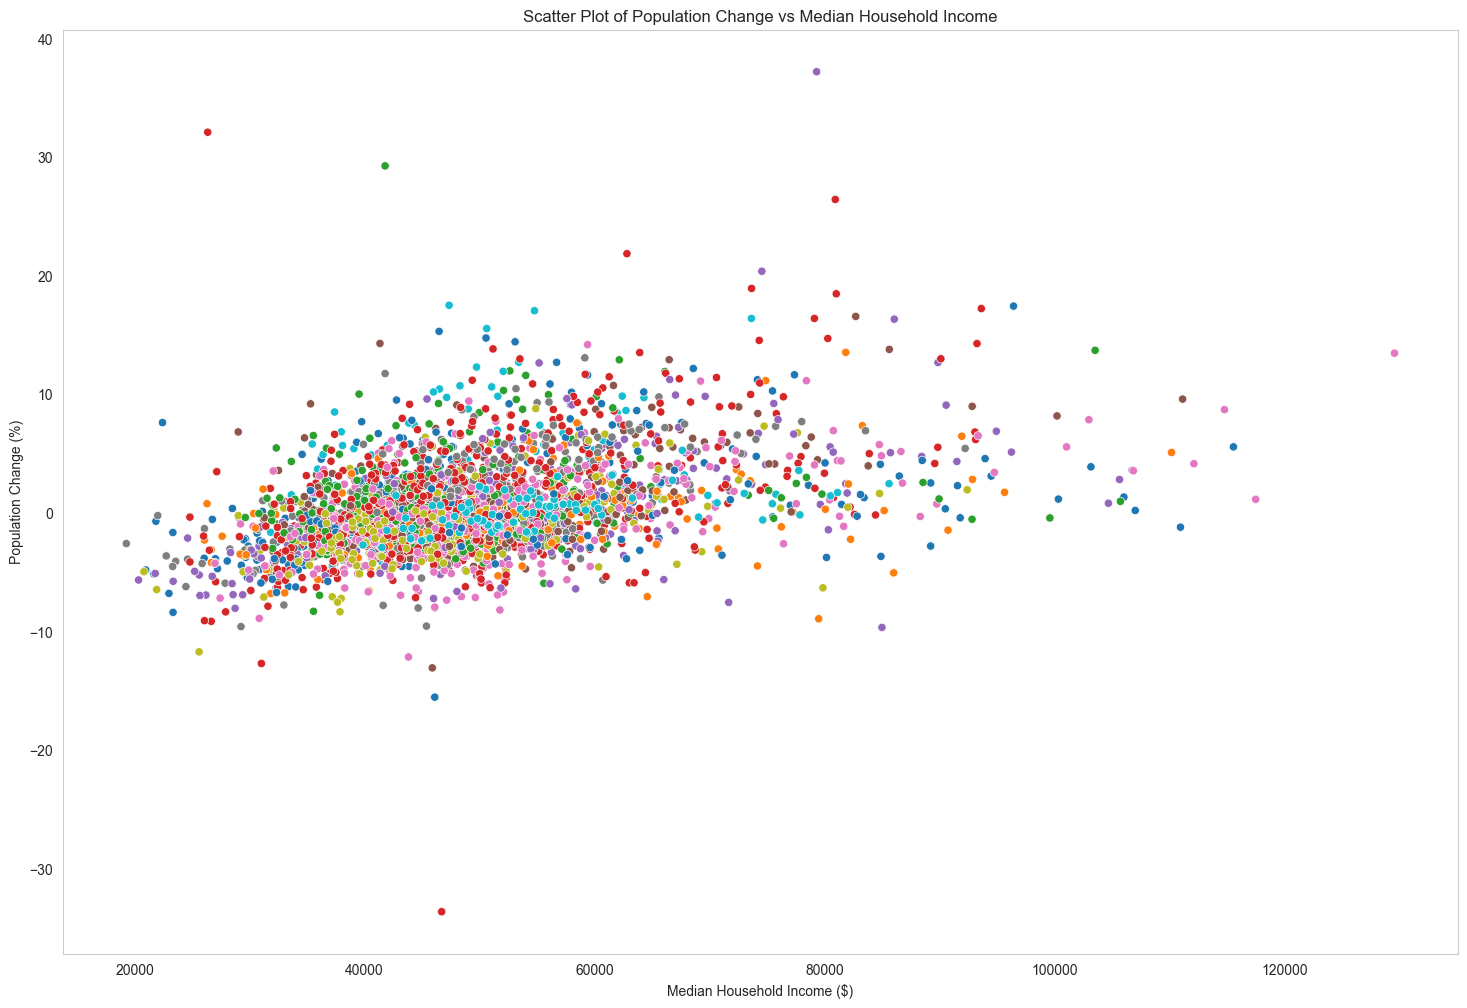

In [13]:
# Population Change vs Median Household Income
plt.figure(figsize=(18, 12))


sns.scatterplot(
    data=country_df,
    x='median_hh_income',
    y='pop_change',
    hue='state',
    palette='tab10',
    legend=False
)

plt.xlabel('Median Household Income ($)')
plt.ylabel('Population Change (%)')
plt.title('Scatter Plot of Population Change vs Median Household Income')
plt.grid(False)
plt.show()

In [14]:
raw_corr = country_df[['median_hh_income', 'pop_change']].corr()
raw_corr


,median_hh_income,pop_change
median_hh_income,1.000000,0.407886
pop_change,0.407886,1.000000


In [34]:
# We need to drop rows which not pop_change between 15 and -15 %
filtered_country_df = country_df[
                                 (pd.col('pop_change') <= 20) &
                                 (pd.col('pop_change') >= -15)
                                 # (pd.col('median_hh_income') <= 100000)
                                ]
filtered_corr = filtered_country_df[['median_hh_income', 'pop_change']].corr()
filtered_corr

,median_hh_income,pop_change
median_hh_income,1.000000,0.423554
pop_change,0.423554,1.000000


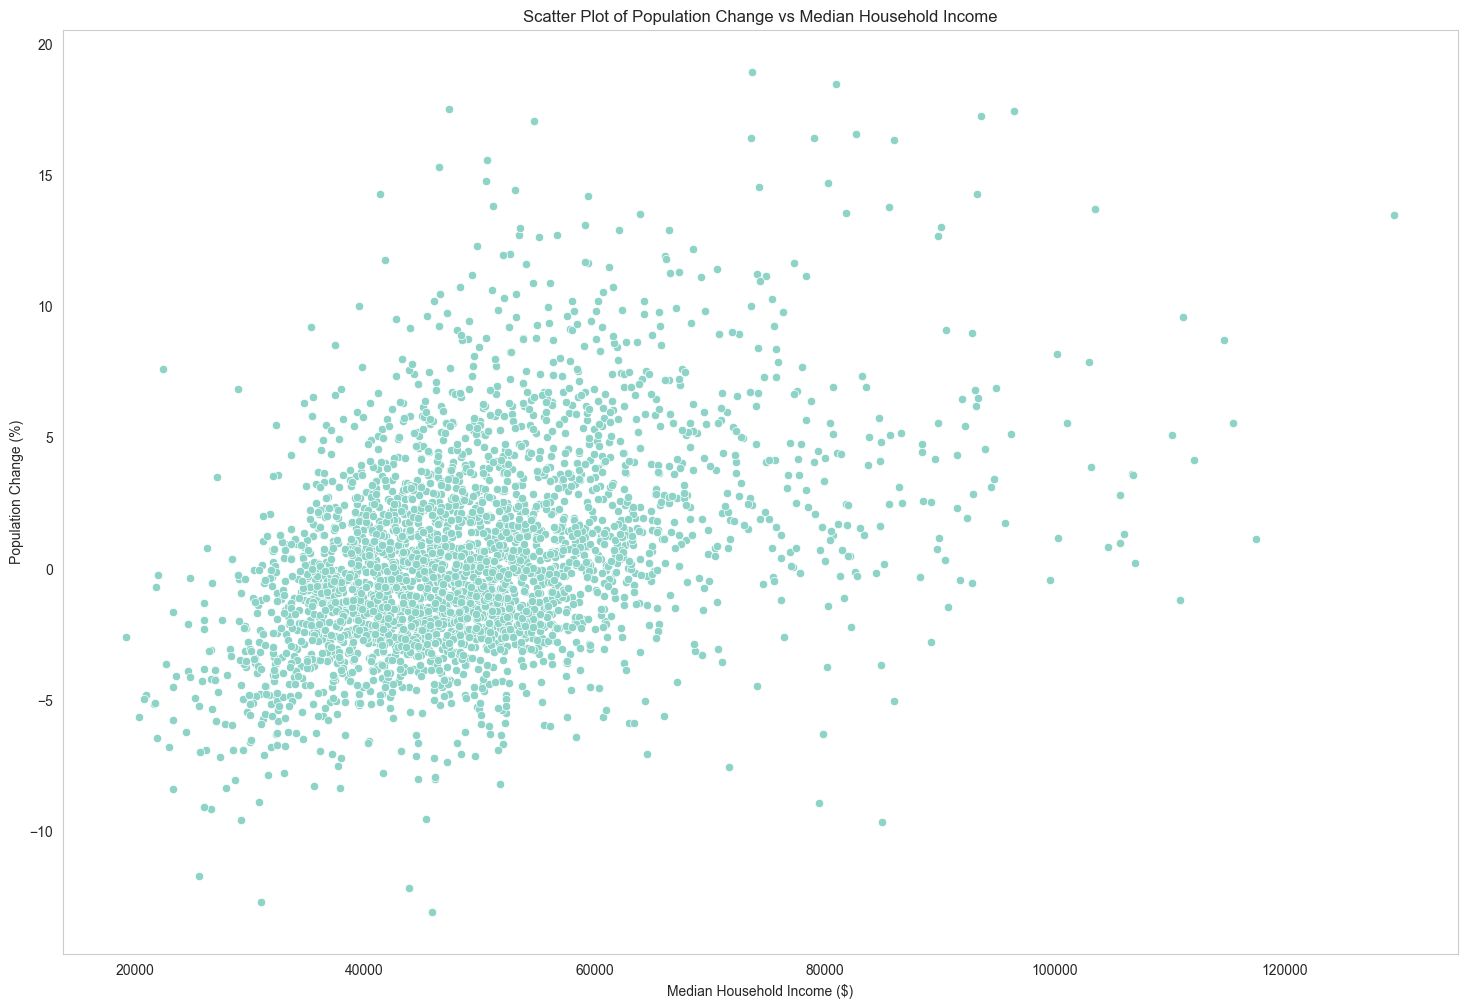

In [35]:
# Population Change vs Median Household Income
plt.figure(figsize=(18, 12))


sns.scatterplot(
    data=filtered_country_df,
    x='median_hh_income',
    y='pop_change',
    legend=False
)

plt.xlabel('Median Household Income ($)')
plt.ylabel('Population Change (%)')
plt.title('Scatter Plot of Population Change vs Median Household Income')
plt.grid(False)
plt.show()

In [36]:
# Exercise 1.7 ( Explore loan50 dataset and find out the correlation between interest rate and loan amount)
loan50 = pd.read_csv("datasets/loan50.csv")

In [37]:
loan50.head(5)

,state,emp_length,term,homeownership,annual_income,verified_income,debt_to_income,total_credit_limit,total_credit_utilized,num_cc_carrying_balance,loan_purpose,loan_amount,grade,interest_rate,public_record_bankrupt,loan_status,has_second_income,total_income
0,NJ,3.0,60,rent,59000,Not Verified,0.557525,95131,32894,8,debt_consolidation,22000,B,10.90,0,Current,False,59000
1,CA,10.0,36,rent,60000,Not Verified,1.305683,51929,78341,2,credit_card,6000,B,9.92,1,Current,False,60000
2,SC,NaN,36,mortgage,75000,Verified,1.056280,301373,79221,14,debt_consolidation,25000,E,26.30,0,Current,False,75000
3,CA,0.0,36,rent,75000,Not Verified,0.574347,59890,43076,10,credit_card,6000,B,9.92,0,Current,False,75000
4,OH,4.0,60,mortgage,254000,Not Verified,0.238150,422619,60490,2,home_improvement,25000,B,9.43,0,Current,False,254000


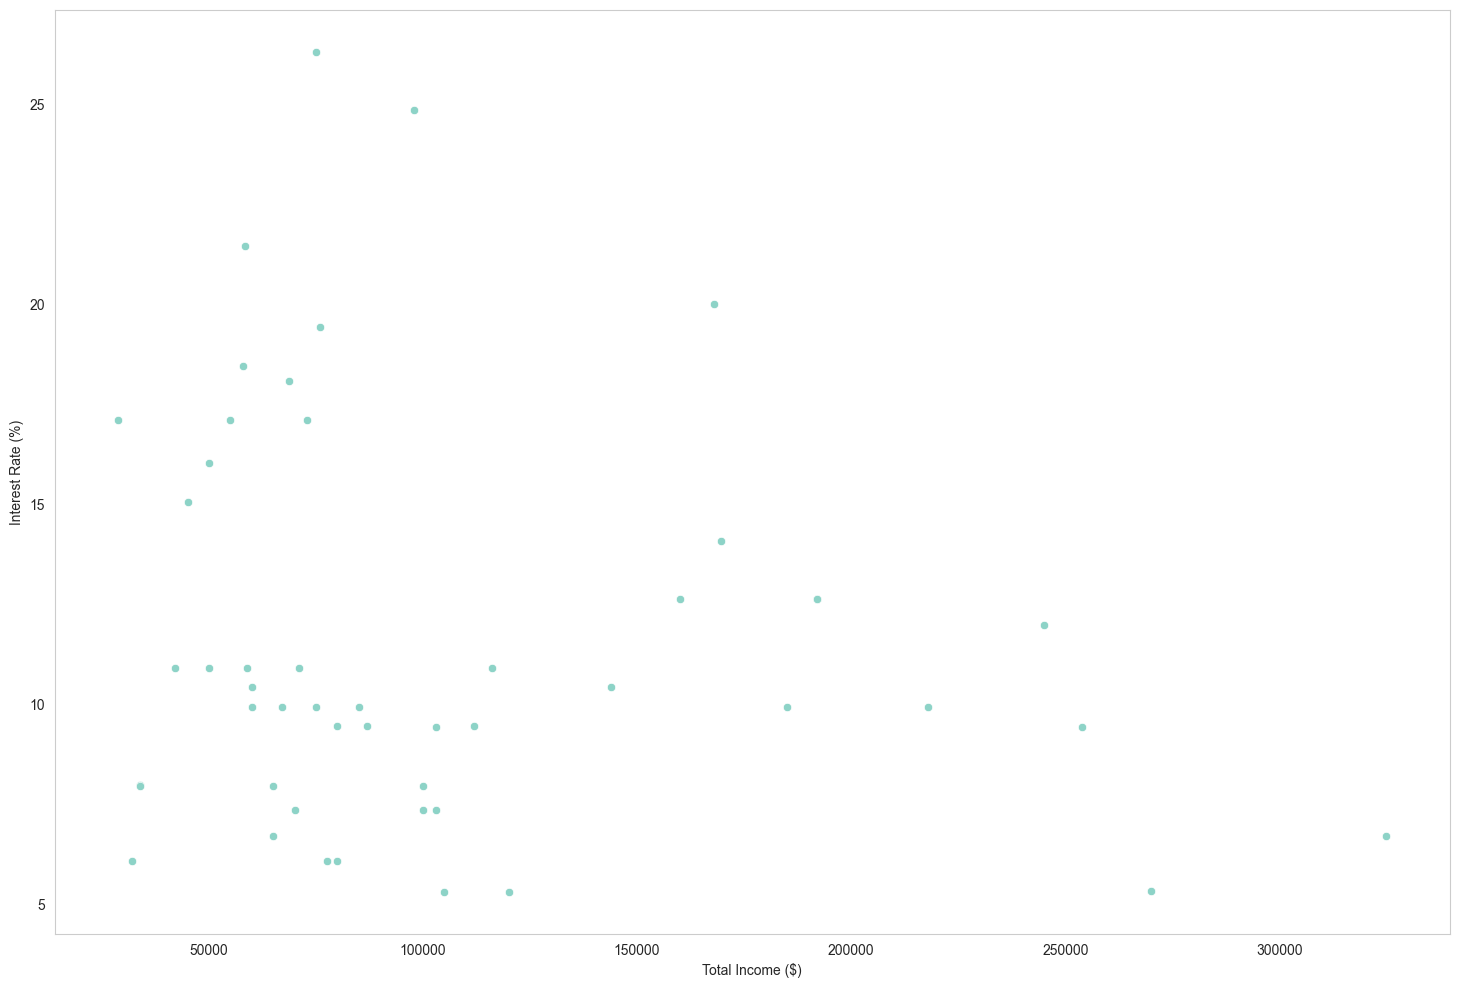

In [51]:
target = 'interest_rate'
feature = 'total_income'

# draw scatter plot
plt.figure(figsize=(18, 12))

sns.scatterplot(
    data=loan50,
    x=feature,
    y=target,
    legend=False
)
plt.xlabel('Total Income ($)')
plt.ylabel('Interest Rate (%)')
plt.grid(False)
plt.show()

In [50]:
# check correlation
loan50[[feature, target]].corr()

,total_income,interest_rate
total_income,1.000000,-0.164802
interest_rate,-0.164802,1.000000


In [52]:
# check correlation where interest rate are below 15%
filtered_loan50 = loan50[pd.col('interest_rate') < 15]
filtered_loan50[[feature, target]].corr()

,total_income,interest_rate
total_income,1.000000,0.132172
interest_rate,0.132172,1.000000


In [53]:
# filter by total income below 150000
filtered_loan50 = loan50[pd.col('total_income') < 150000]
filtered_loan50[[feature, target]].corr()

,total_income,interest_rate
total_income,1.000000,-0.179396
interest_rate,-0.179396,1.000000


In [4]:
# Exercise 1.21 Internet use and life expectancy
internet_life = pd.read_csv("datasets/cia_factbook.csv")

In [5]:
internet_life.head(5)

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


In [7]:
internet_life['int_pop_perc'] = (internet_life['internet_users'] / internet_life['population']) * 100

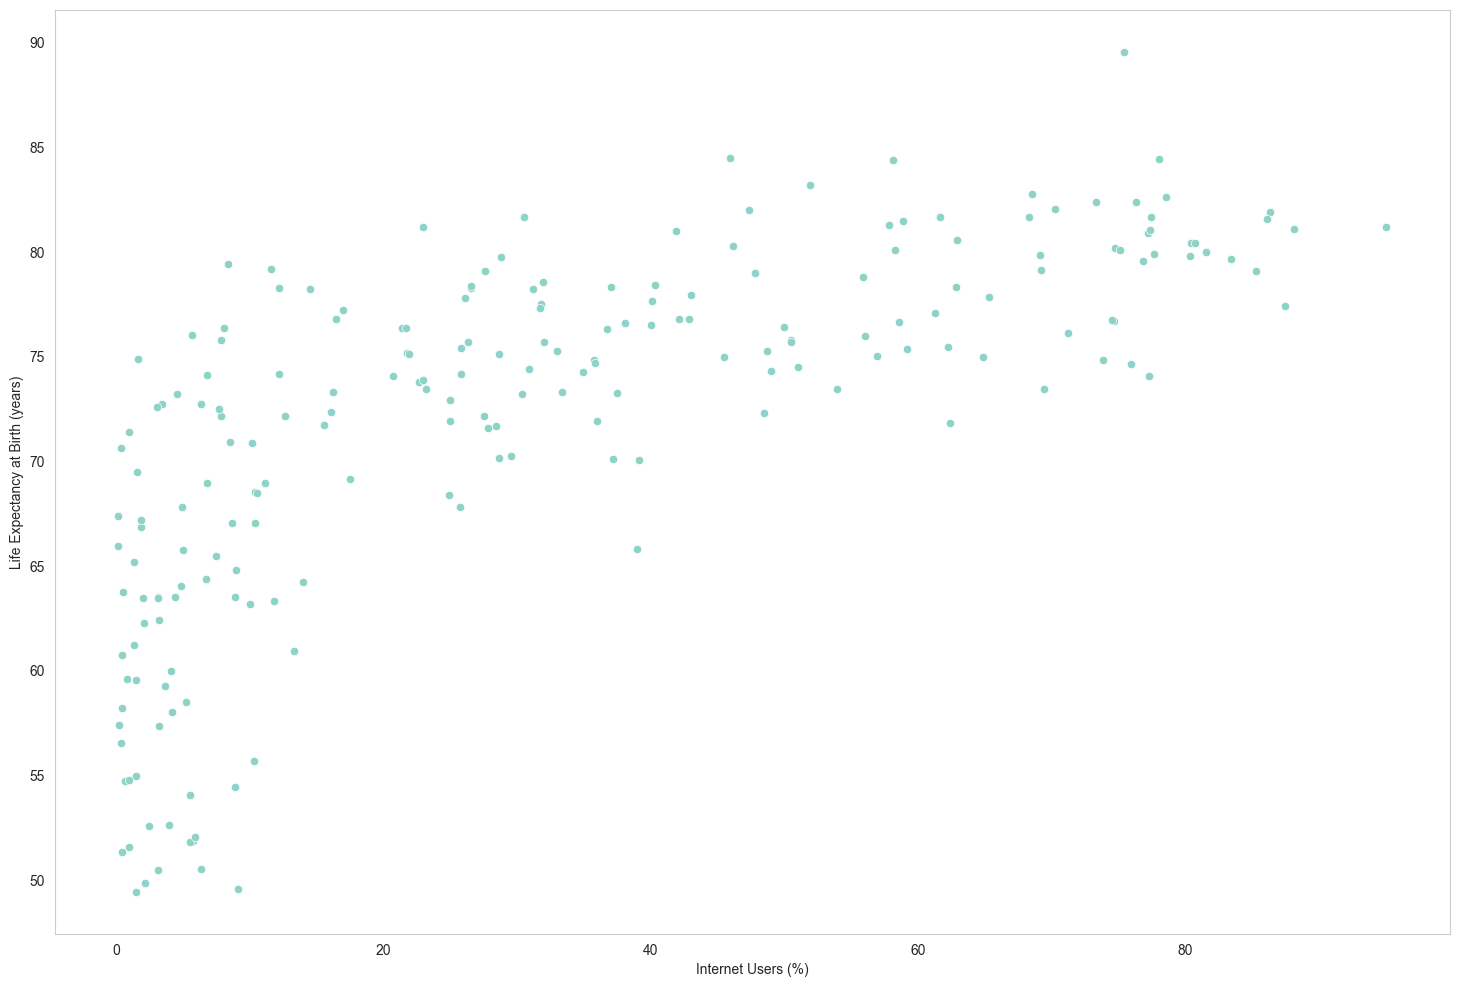

In [8]:
# let's draw scetter using life_exp_at_birth vs internet_users
plt.figure(figsize=(18, 12))

sns.scatterplot(
    data=internet_life,
    x='int_pop_perc',
    y='life_exp_at_birth',
    legend=False
)
plt.xlabel('Internet Users (%)')
plt.ylabel('Life Expectancy at Birth (years)')
plt.grid(False)
plt.show()

In [9]:
# check correlation
internet_life[['int_pop_perc', 'life_exp_at_birth']].corr() # 0.71 - strong positive correlation

# Q: What type of study is ?
# A: Observational Study
# Q: State a possible confounding variable that may affect the relationship between internet use and life expectancy.
# A: GDP per capita, Access to healthcare, Education levels, Urbanization

,int_pop_perc,life_exp_at_birth
int_pop_perc,1.000000,0.713177
life_exp_at_birth,0.713177,1.000000


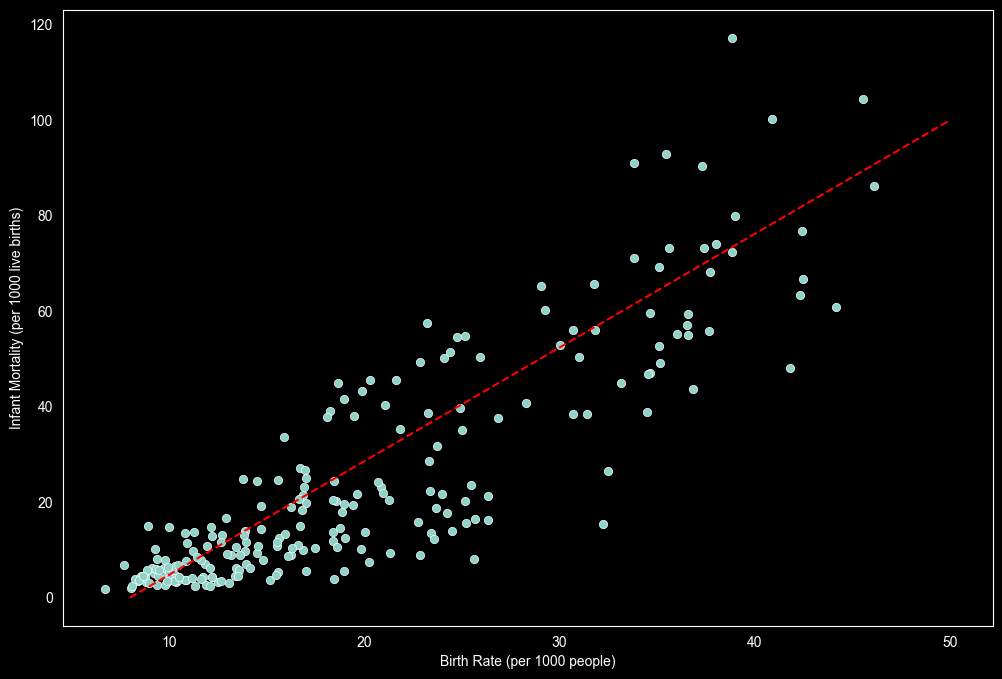

In [33]:
# let's draw birth rate vs infant mortality
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=internet_life,
    x='birth_rate',
    y='infant_mortality_rate',
    legend=False
)

#  draw curve from 0,0 to 50, 120
plt.plot([8, 50], [0, 100], color='red', linestyle='--') # x, y - x,y
plt.xlabel('Birth Rate (per 1000 people)')
plt.ylabel('Infant Mortality (per 1000 live births)')
plt.grid(False)
plt.show()

In [12]:
# check correlation
internet_life[['birth_rate', 'infant_mortality_rate']].corr() #

,birth_rate,infant_mortality_rate
birth_rate,1.00000,0.87329
infant_mortality_rate,0.87329,1.00000
